# Определение перспективного тарифа для телеком компании

## Описание проекта

    Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

    Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

**Внимание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Данные

Датасеты представлены ввиде файлов с расширением csv (real_estate_data.csv).  

Путь к файлам:
* /datasets/calls.csv
* /datasets/internet.csv
* /datasets/messages.csv
* /datasets/tariffs.csv
* /datasets/users.csv

## Описание данных

Таблица `users` (информация о пользователях):
* *user_id* — уникальный идентификатор пользователя
* *first_name* — имя пользователя
* *last_name* — фамилия пользователя
* *age* — возраст пользователя (годы)
* *reg_date* — дата подключения тарифа (день, месяц, год)
* *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* *city* — город проживания пользователя
* *tariff* — название тарифного плана

Таблица `calls` (информация о звонках):
* *id* — уникальный номер звонка
* *call_date* — дата звонка
* *duration* — длительность звонка в минутах
* *user_id* — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
* *id* — уникальный номер сообщения
* *message_date* — дата сообщения
* *user_id* — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
* *id* — уникальный номер сессии
* *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
* *session_date* — дата интернет-сессии
* *user_id* — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
* *tariff_name* — название тарифа
* *rub_monthly_fee* — ежемесячная абонентская плата в рублях
* *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
* *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
* *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
* *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Примечание.** Если объединение таблиц методом `merge` приводит к ошибке `dead kernell`, примените метод `join` — это облегчит нагрузку на Jupyter Notebook.

# <a name="Back"></a> Задачи исследования

[**1. Открыть файлы с данными и изучить общую информацию**](#Explore)
- [Открыть каждый файл](#Open)
- [Изучить общую информацию по каждому файлу](#Study)

[**2. Подготовка данных**](#Preparation)
* [Привести данные к нужным типам](#Bring)
* [Найти и исправить ошибки в данных](#Find)
* [Посчитайте для каждого пользователя:](#Count)
    - [количество сделанных звонков и израсходованных минут разговора по месяцам](#Number_calls)
    - [количество отправленных сообщений по месяцам](#Number_messages)
    - [объем израсходованного интернет-трафика по месяцам](#Internet_traffic)
    - [помесячную выручку с каждого пользователя](#Monthly_revenue)

[**3. Анализ данных**](#Data_analysis)
* [Описать поведение клиентов оператора, исходя из выборки](#Customer_behavior)
* [Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц](#User_needs)
* [Посчитать среднее количество, дисперсию и стандартное отклонение](#Deviation)
* [Построить гистограммы](#Plot_hist)
* [Описать распределения](#Describe_distributions)

[**4. Проверка гипотез**](#Hypothesis)
* [средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#User_revenue)
* [средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  ](#Revenue_users_from_Moscow)
    
    Пороговое значение alpha задать самостоятельно  
    
    **Пояснить:**
        как формулирована нулевая и альтернативная гипотезы;
        какой критерий использовался для проверки гипотез и почему.

[**5. Результаты**](#Results)
* [Вывод](#Conclusion)
* [Рекомендации](#Recommendations)

## <a name="Explore"></a> 1. Открыть файлы с данными и изучить общую информацию

In [1]:
import pandas as pd
import numpy as np
import math as mt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from scipy import stats as st



In [2]:
# настройка отображения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

### <a name="Open"></a> Открыть каждый файл

In [3]:
# чтение файлов
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### <a name="Study"></a> Изучить общую информацию по каждому файлу

In [4]:
# создаем список с файлами
file_list = [calls, internet, messages, tariffs, users]

# функция выводящая общую информацию по каждому файлу
def general_info(list):
    
    for file in file_list:
        print('-' * 100, '\n')
        display(file.info())
        display(file.describe().T)
        
        # данный блок исправляет ошибку, которая не позволяет выводит количество строк больше,
        # чем количество строк в самом дата фрейме
        if file.shape[0] > 10:
            display(file.sample(10))
        else:
            display(file.sample(file.shape[0]))

        
general_info(file_list)

---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
duration,"202,607.00",6.76,5.84,0.00,1.30,6.00,10.70,38.00
user_id,"202,607.00","1,253.94",144.72,"1,000.00","1,126.00","1,260.00","1,379.00","1,499.00"


,id,call_date,duration,user_id
6811,1018_599,2018-11-26,0.31,1018
181646,1453_838,2018-02-27,11.43,1453
151705,1378_792,2018-01-19,17.20,1378
106610,1275_70,2018-06-08,8.22,1275
114060,1291_686,2018-10-10,8.18,1291
126620,1325_1,2018-10-30,0.00,1325
170912,1422_13,2018-10-22,0.00,1422
145702,1370_88,2018-09-26,1.11,1370
181471,1453_663,2018-07-17,3.76,1453
169829,1418_46,2018-12-24,3.06,1418


---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,"149,396.00","74,697.50","43,127.05",0.00,"37,348.75","74,697.50","112,046.25","149,395.00"
mb_used,"149,396.00",370.19,278.30,0.00,138.19,348.01,559.55,"1,724.83"
user_id,"149,396.00","1,252.10",144.05,"1,000.00","1,130.00","1,251.00","1,380.00","1,499.00"


,Unnamed: 0,id,mb_used,session_date,user_id
15048,15048,1054_28,83.41,2018-07-25,1054
81839,81839,1277_57,105.61,2018-08-08,1277
100517,100517,1337_554,415.34,2018-06-17,1337
41993,41993,1146_328,0.00,2018-08-14,1146
88867,88867,1300_239,283.34,2018-08-12,1300
20951,20951,1071_68,731.06,2018-07-25,1071
125378,125378,1421_563,304.22,2018-10-04,1421
26874,26874,1093_77,188.72,2018-10-09,1093
7875,7875,1027_202,403.85,2018-05-01,1027
109927,109927,1374_138,355.26,2018-05-31,1374


---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,count,mean,std,min,25%,50%,75%,max
user_id,"123,036.00","1,256.99",143.52,"1,000.00","1,134.00","1,271.00","1,381.00","1,499.00"


,id,message_date,user_id
19671,1087_69,2018-11-10,1087
96089,1395_76,2018-07-20,1395
19397,1086_83,2018-06-24,1086
94356,1385_1065,2018-07-31,1385
75180,1318_209,2018-05-04,1318
88873,1372_293,2018-09-23,1372
5105,1021_261,2018-12-10,1021
89110,1373_122,2018-02-08,1373
72751,1308_211,2018-05-25,1308
3778,1015_43,2018-05-14,1015


---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,count,mean,std,min,25%,50%,75%,max
messages_included,2.00,525.00,671.75,50.00,287.50,525.00,762.50,"1,000.00"
mb_per_month_included,2.00,"23,040.00","10,861.16","15,360.00","19,200.00","23,040.00","26,880.00","30,720.00"
minutes_included,2.00,"1,750.00","1,767.77",500.00,"1,125.00","1,750.00","2,375.00","3,000.00"
rub_monthly_fee,2.00,"1,250.00",989.95,550.00,900.00,"1,250.00","1,600.00","1,950.00"
rub_per_gb,2.00,175.00,35.36,150.00,162.50,175.00,187.50,200.00
rub_per_message,2.00,2.00,1.41,1.00,1.50,2.00,2.50,3.00
rub_per_minute,2.00,2.00,1.41,1.00,1.50,2.00,2.50,3.00


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,count,mean,std,min,25%,50%,75%,max
user_id,500.00,"1,249.50",144.48,"1,000.00","1,124.75","1,249.50","1,374.25","1,499.00"
age,500.00,46.59,16.67,18.00,32.00,46.00,62.00,75.00


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
480,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart
220,1220,59,NaN,Ростов-на-Дону,Рубен,Астапов,2018-11-22,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
141,1141,52,NaN,Москва,Клариса,Короткова,2018-12-02,smart
69,1069,36,NaN,Екатеринбург,Гордей,Кочетов,2018-12-10,smart
343,1343,30,2018-10-28,Кострома,Анита,Верещагина,2018-08-15,ultra
280,1280,53,NaN,Астрахань,Артемий,Худяков,2018-07-18,smart
434,1434,73,NaN,Москва,Карина,Субботина,2018-12-14,smart
169,1169,52,NaN,Сочи,Георгина,Карташова,2018-06-25,smart
134,1134,65,NaN,Красноярск,Марьяна,Авросимова,2018-01-16,smart


### Вывод
1. Прочитали каждый файл
2. Изучили общую информацию
   - выявлено следующее:
       - в данных users, столбец churn_date 38 дат (остальные значения говорят о том, что тарифом еще пользуются)
       - в данных internet дополнительный столбец дублирующий индекс (необходимо удалить)
       - в данных calls в столбце duration, есть нулевые значения (возможно округление, либо звонок был скинут)

[Вернуться к задачам](#Back)

## <a name="Preparation"></a> 2. Подготовка данных

### <a name="Bring"></a> Привести данные к нужным типам

In [5]:
# оптимизация памяти, приведение типов данных в порядок
# оптимизация файла calls
dtypes = calls.drop('call_date',axis=1).dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

calls = pd.read_csv('/datasets/calls.csv', dtype=column_types,parse_dates=['call_date'], infer_datetime_format=True)

# оптимизация файла internet
dtypes = internet.drop('session_date',axis=1).dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

internet = pd.read_csv('/datasets/internet.csv', dtype=column_types,parse_dates=['session_date'], infer_datetime_format=True)

# оптимизация файла messages
dtypes = messages.drop('message_date',axis=1).dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

messages = pd.read_csv('/datasets/messages.csv', dtype=column_types,parse_dates=['message_date'], infer_datetime_format=True)

# оптимизация файла tariffs
dtypes = tariffs.dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

tariffs = pd.read_csv('/datasets/tariffs.csv', dtype=column_types, infer_datetime_format=True)

# оптимизация файла users
dtypes = users.drop(['reg_date', 'churn_date'],axis=1).dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

users = pd.read_csv('/datasets/users.csv', dtype=column_types,parse_dates=['reg_date', 'churn_date'],
                    infer_datetime_format=True)

### <a name="Find"></a> Найти и исправить ошибки в данных

In [6]:
# округляем знаяения столбца duration в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

# удаляем звонки с продолжительностью 0
calls = calls.query('duration != 0')

# удаляем лишний столбец
del internet['Unnamed: 0']

# проверем дубликаты
data_list = [calls, internet, messages, tariffs, users]
for data in data_list:
    print(data.duplicated(subset=[column for column in list(data.columns)], keep=False).sum())

0
0
0
0
0


### <a name="Count"></a>  Посчитайте для каждого пользователя:

#### <a name="Number_calls"></a> Количество сделанных звонков и израсходованных минут разговора по месяцам

In [7]:
# добовляем колонку с месяцами
calls['month'] = calls['call_date'].dt.month

display(calls.sample(5))

# считаем количество звонков и изразходованных минут
calls_minutes = calls.groupby(['user_id', 'month'])\
                                .agg({'duration': 'sum', 'id': 'count'})\
                                .reset_index()\
                                .sort_values(['user_id','month']).rename(columns={'duration': 'spent_minutes_per_month',\
                                                                      'id': 'calls_made_per_months'})

calls_minutes.head(10)

,id,call_date,duration,user_id,month
182479,1454_231,2018-12-22,6,1454,12
92000,1228_412,2018-10-14,7,1228,10
133311,1341_541,2018-10-07,3,1341,10
8535,1021_1003,2018-12-29,1,1021,12
7680,1021_148,2018-05-29,11,1021,5


,user_id,month,spent_minutes_per_month,calls_made_per_months
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46
5,1000,10,350,44
6,1000,11,338,37
7,1000,12,333,38
8,1001,11,430,45
9,1001,12,414,47


#### <a name="Number_messages"></a> Количество отправленных сообщений по месяцам

In [8]:
# добовляем колонку с месяцами
messages['month'] = messages['message_date'].dt.month

display(messages.sample(5))

# считаем количество сообщений
messages_made = messages.groupby(['user_id', 'month'])\
                                .agg({'id': 'count'})\
                                .reset_index()\
                                .sort_values(['user_id','month']).rename(columns={'id': 'messages_made_per_months'})

messages_made.head(10)

,id,message_date,user_id,month
14738,1065_74,2018-06-17,1065,6
111879,1452_268,2018-12-05,1452,12
19038,1083_227,2018-09-25,1083,9
54046,1239_111,2018-11-15,1239,11
115153,1471_381,2018-06-05,1471,6


,user_id,month,messages_made_per_months
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


#### <a name="Internet_traffic"></a> Объем израсходованного интернет-трафика по месяцам

In [9]:
# добовляем колонку с месяцами
internet['month'] = internet['session_date'].dt.month

display(internet.sample(5))

# считаем количество сообщений
internet_traffic = internet.groupby(['user_id', 'month'])\
                                .agg({'mb_used': 'sum'})\
                                .reset_index()\
                                .sort_values(['user_id','month']).rename(columns={'mb_used': 'internet_traffic_per_months'})

# переведем интернет трафик в Gb и округлим Mb вверх
internet_traffic['internet_traffic_per_months'] = internet_traffic['internet_traffic_per_months'].apply(np.ceil).astype('int')
internet_traffic['internet_traffic_per_months'] = internet_traffic['internet_traffic_per_months'] / 1024

internet_traffic.head(10)

,id,mb_used,session_date,user_id,month
114505,1385_713,364.81,2018-02-16,1385,2
138125,1464_349,820.85,2018-08-09,1464,8
3735,1012_8,208.18,2018-12-14,1012,12
105761,1357_188,0.00,2018-12-13,1357,12
31062,1109_128,540.41,2018-11-15,1109,11


,user_id,month,internet_traffic_per_months
0,1000,5,2.20
1,1000,6,22.69
2,1000,7,13.68
3,1000,8,13.73
4,1000,9,14.23
5,1000,10,14.36
6,1000,11,14.41
7,1000,12,9.59
8,1001,11,18.00
9,1001,12,13.71


#### <a name="Monthly_revenue"></a> Помесячную выручку с каждого пользователя

In [10]:
# объединяем таблицы в одну
data = calls_minutes.join(messages_made.set_index(['user_id', 'month']), on=['user_id', 'month'], how='outer')
data = data.join(internet_traffic.set_index(['user_id', 'month']), on=['user_id', 'month'], how='outer')
data = data.join(users.set_index('user_id'), on='user_id')

# переименовываем столбец для объединения
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)

data = data.join(tariffs.set_index('tariff'), on='tariff')

data.head()

,user_id,month,spent_minutes_per_month,calls_made_per_months,messages_made_per_months,internet_traffic_per_months,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.00,17.00,22.00,2.20,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.00,28.00,60.00,22.69,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.00,41.00,75.00,13.68,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.00,42.00,81.00,13.73,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.00,46.00,57.00,14.23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [11]:
# проверяем на NaN
data.isna().sum()

user_id                           0
month                             0
spent_minutes_per_month          46
calls_made_per_months            46
messages_made_per_months        497
internet_traffic_per_months      11
age                               0
churn_date                     3027
city                              0
first_name                        0
last_name                         0
reg_date                          0
tariff                            0
messages_included                 0
mb_per_month_included             0
minutes_included                  0
rub_monthly_fee                   0
rub_per_gb                        0
rub_per_message                   0
rub_per_minute                    0
dtype: int64

In [12]:
# проставим 0
data['spent_minutes_per_month'] = data['spent_minutes_per_month'].fillna(0)
data['calls_made_per_months'] = data['calls_made_per_months'].fillna(0)
data['messages_made_per_months'] = data['messages_made_per_months'].fillna(0)
data['internet_traffic_per_months'] = data['internet_traffic_per_months'].fillna(0)

# проверяем на NaN
data.isna().sum()

user_id                           0
month                             0
spent_minutes_per_month           0
calls_made_per_months             0
messages_made_per_months          0
internet_traffic_per_months       0
age                               0
churn_date                     3027
city                              0
first_name                        0
last_name                         0
reg_date                          0
tariff                            0
messages_included                 0
mb_per_month_included             0
minutes_included                  0
rub_monthly_fee                   0
rub_per_gb                        0
rub_per_message                   0
rub_per_minute                    0
dtype: int64

In [13]:
# функция считает сколько пользователь заплатил сверх тарифа
def over_tariff_paid(row):
    spent_minutes = (row['spent_minutes_per_month'] - row['minutes_included']) * row['rub_per_minute']
    spent_message = (row['messages_made_per_months'] - row['messages_included']) * row['rub_per_message']
    spent_internet = (row['internet_traffic_per_months'] - (row['mb_per_month_included'] / 1024)) * row['rub_per_gb']
    spent_tariff = [spent_minutes, spent_message, spent_internet]
    
    total = 0
    
    for spent in spent_tariff:
        if spent > 0:
            total += spent
    return total

In [14]:
# создаем новую колноку и добавляем суммой потраченой сверх тарифа
data['over_tariff_paid'] = data.apply(over_tariff_paid, axis=1)
data[data['over_tariff_paid'] > 0].head()

,user_id,month,spent_minutes_per_month,calls_made_per_months,messages_made_per_months,internet_traffic_per_months,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_tariff_paid
8,1001,11,430.00,45.00,0.00,18.00,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,599.61
11,1002,7,214.00,21.00,11.00,17.17,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,433.79
12,1002,8,289.00,37.00,13.00,19.84,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,968.75
13,1002,9,206.00,25.00,4.00,16.30,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,260.16
15,1002,11,243.00,25.00,16.00,18.15,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,630.47


In [15]:
# создаем новую колонку с суммой потраченой всего за месяц
data['total_paid_per_month'] = data['rub_monthly_fee'] + data['over_tariff_paid']
data.sample(10)

,user_id,month,spent_minutes_per_month,calls_made_per_months,messages_made_per_months,internet_traffic_per_months,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_tariff_paid,total_paid_per_month
225,1035,7,493.00,51.00,63.00,13.99,37,NaT,Тюмень,Розалия,Аракина,2018-04-03,smart,50,15360,500,550,200,3,3,39.00,589.00
40,1005,11,547.00,60.00,51.00,12.37,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3,144.00,694.00
205,1032,6,402.00,41.00,33.00,18.64,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,50,15360,500,550,200,3,3,728.32,"1,278.32"
106,1014,11,237.00,30.00,36.00,24.52,64,NaT,Чебоксары,Яков,Акинфьев,2018-05-15,smart,50,15360,500,550,200,3,3,"1,903.91","2,453.91"
641,1102,7,538.00,53.00,40.00,20.94,28,NaT,Москва,Марта,Королькова,2018-06-16,smart,50,15360,500,550,200,3,3,"1,301.89","1,851.89"
837,1134,10,549.00,60.00,72.00,15.95,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart,50,15360,500,550,200,3,3,403.23,953.23
1636,1263,11,476.00,63.00,9.00,17.80,32,NaT,Балашиха,Ермолай,Зайцев,2018-04-30,smart,50,15360,500,550,200,3,3,559.77,"1,109.77"
333,1054,5,737.00,77.00,55.00,15.72,33,NaT,Омск,Кристина,Платонова,2018-03-20,smart,50,15360,500,550,200,3,3,869.55,"1,419.55"
2320,1373,10,23.00,3.00,55.00,18.10,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,50,15360,500,550,200,3,3,635.90,"1,185.90"
2771,1435,4,309.00,37.00,0.00,17.02,32,NaT,Москва,Евфросинья,Азимова,2018-02-17,smart,50,15360,500,550,200,3,3,403.12,953.12


### Вывод
1. Посчитано количество сделанных звонков и израсходованных минут разговора по месяцам
2. Посчитано количество отправленных сообщений по месяцам
3. Посчитан объем израсходованного интернет-трафика по месяцам
4. Все выше перечесленные таблицы объеденнены в одну (data)
5. Посчитана помесячная выручка с каждого пользователя

[Вернуться к задачам](#Back)

## <a name="Data_analysis"></a> 3. Анализ данных

### <a name="Customer_behavior"></a> Описать поведение клиентов оператора, исходя из выборки

In [16]:
# посмотрим сколько в среднем тратят минут, смс и интернет трафика в месяц на каждом тарифе, а так же сколько тратят.
tariff_group = data.groupby('tariff')[['spent_minutes_per_month',\
                                       'messages_made_per_months',\
                                       'internet_traffic_per_months',\
                                       'total_paid_per_month']].agg(['median', 'mean']).reset_index()

tariff_group

tariff spent_minutes_per_month        messages_made_per_months        \
                          median   mean                   median  mean   
0  smart                  422.00 417.93                    28.00 33.38   
1  ultra                  518.00 526.62                    38.00 49.36   

  internet_traffic_per_months       total_paid_per_month           
                       median  mean               median     mean  
0                       16.12 15.83               958.00 1,230.50  
1                       18.86 19.01             1,950.00 2,059.88

In [17]:
# количество пользователей Смарт платящих сверх тарифа
tariff_smart = data[data['tariff'] == 'smart']
percent_over_tariff_paid_smart = tariff_smart[tariff_smart['over_tariff_paid'] > 0].shape[0] / tariff_smart.shape[0] * 100
print('Количество пользователей переплачивающих на тарифе "Смарт" {:.2f}%'.format(percent_over_tariff_paid_smart))

# количество пользователей Ультра платящих сверх тарифа
tariff_ultra = data[data['tariff'] == 'ultra']
percent_over_tariff_paid_ultra = tariff_ultra[tariff_ultra['over_tariff_paid'] > 0].shape[0] / tariff_ultra.shape[0] * 100
print('Количество пользователей переплачивающих на тарифе "Ультра" {:.2f}%'.format(percent_over_tariff_paid_ultra))

# % пользователей Смарт И Ультра
print('% пользователей тарифа "Смарт" от общего количества пользователей {:.2f}%'
      .format(tariff_smart.shape[0] / data['tariff'].shape[0] * 100))
print('% пользователей тарифа "Ультра" от общего количества пользователей {:.2f}%'
      .format(tariff_ultra.shape[0] / data['tariff'].shape[0] * 100))

Количество пользователей переплачивающих на тарифе "Смарт" 74.56%
Количество пользователей переплачивающих на тарифе "Ультра" 13.60%
% пользователей тарифа "Смарт" от общего количества пользователей 69.35%
% пользователей тарифа "Ультра" от общего количества пользователей 30.65%


In [18]:
# % пользователей Смарт платящих сверх или равную сумму ежемесячной платы тарифа Ультра
tariff_smart = data[data['tariff'] == 'smart']
percent_over_tariff_paid_smart = tariff_smart[tariff_smart['total_paid_per_month'] > 1950].shape[0] / tariff_smart.shape[0] * 100
print('% пользователей тарифа "Смарт" платящих равную или сверх платы тарифа Ультра {:.2f}%'.format(percent_over_tariff_paid_smart))


% пользователей тарифа "Смарт" платящих равную или сверх платы тарифа Ультра 17.05%


74.56% польpователей тарифа Смарт платят сверх тарифа  
13.60% польpователей тарифа Ультра платят сверх тарифа  
17.05% пользователей тарифа Смарт могут перейти на тариф Ультра

### <a name="User_needs"></a> Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц  
### <a name="Plot_hist"></a> Построить гистограммы  
### <a name="Describe_distributions"></a> Описать распределения

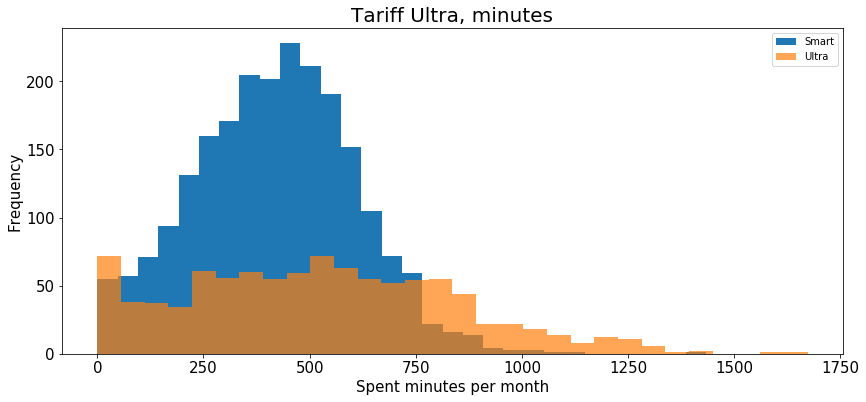

In [19]:
# количество минут потраченых в месяц на тарифе Смарт
data[data['tariff'] == 'smart']['spent_minutes_per_month'].plot(title='Tariff Smart, minutes', fontsize=15, legend=True,\
                        kind='hist', bins=30, figsize=(14, 6)).title.set_size(20)

# количество минут потраченых в месяц на тарифе Ултра
data[data['tariff'] == 'ultra']['spent_minutes_per_month'].plot(title='Tariff Ultra, minutes', fontsize=15, legend=True,\
                        kind='hist', bins=30, figsize=(14, 6), alpha=0.7).title.set_size(20)
plt.xlabel('Spent minutes per month',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['Smart', 'Ultra'])
plt.show()

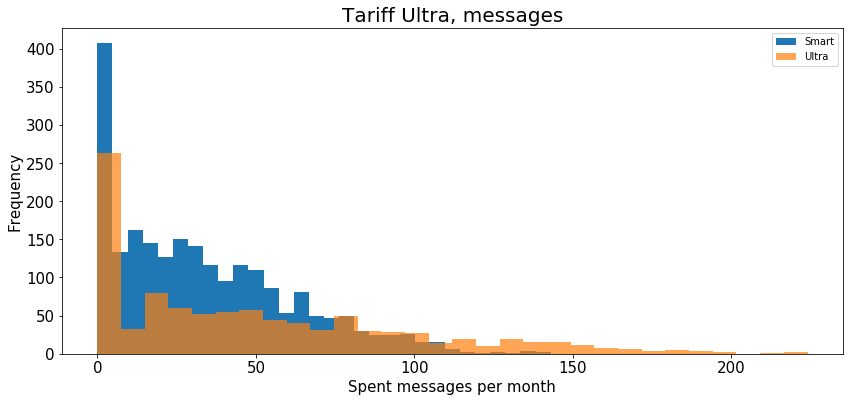

In [20]:
# количество смс потраченых в месяц на тарифе Смарт
data[data['tariff'] == 'smart']['messages_made_per_months'].plot(title='Tariff Smart, messages', fontsize=15, legend=True,\
                        kind='hist', bins=30, figsize=(14, 6)).title.set_size(20)

# количество смс потраченых в месяц на тарифе Ултра
data[data['tariff'] == 'ultra']['messages_made_per_months'].plot(title='Tariff Ultra, messages', fontsize=15, legend=True,\
                        kind='hist', bins=30, figsize=(14, 6), alpha=0.7).title.set_size(20)
plt.xlabel('Spent messages per month',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['Smart', 'Ultra'])
plt.show()

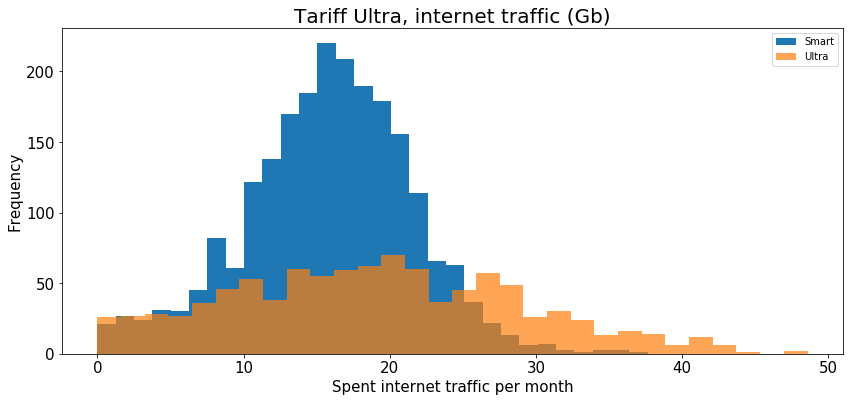

In [21]:
# количество интернет трафика (в Гб) потраченых в месяц на тарифе Смарт
data[data['tariff'] == 'smart']['internet_traffic_per_months'].plot(title='Tariff Smart, internet traffic (Gb)',\
                                                                    fontsize=15, legend=True, kind='hist',\
                                                                    bins=30, figsize=(14, 6)).title.set_size(20)

# количество интернет трафика (в Гб) потраченых в месяц на тарифе Ултра
data[data['tariff'] == 'ultra']['internet_traffic_per_months'].plot(title='Tariff Ultra, internet traffic (Gb)',\
                                                                    fontsize=15, legend=True, kind='hist',\
                                                                    bins=30, figsize=(14, 6),alpha=0.7).title.set_size(20)
plt.xlabel('Spent internet traffic per month',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['Smart', 'Ultra'])
plt.show()

    На тарифе Смарт пользователи выходят за рамки пакета минут, в то время как на тарифе Ультра, пользователи не выговаривают предоставленые минуты
    На обоих тирифах, пользователи практически не пользуются смс
    Большинству пользователей не хватает пакета мегабайт на тарифе Смарт, на тарифе Ультра обратная ситуация

### <a name="Deviation"></a> Посчитать среднее количество, дисперсию и стандартное отклонение

In [22]:
data.groupby('tariff').agg({'spent_minutes_per_month':['mean', 'var', 'std']}).reset_index()

tariff spent_minutes_per_month                  
                            mean        var    std
0  smart                  417.93  36,219.32 190.31
1  ultra                  526.62 100,873.63 317.61

In [23]:
data.groupby('tariff').agg({'messages_made_per_months':['mean', 'var', 'std']}).reset_index()

tariff messages_made_per_months               
                             mean      var   std
0  smart                    33.38   796.81 28.23
1  ultra                    49.36 2,285.27 47.80

In [24]:
data.groupby('tariff').agg({'internet_traffic_per_months':['mean', 'var', 'std']}).reset_index()

tariff internet_traffic_per_months           
                                mean   var  std
0  smart                       15.83 32.87 5.73
1  ultra                       19.01 97.04 9.85

[Вернуться к задачам](#Back)

### 4. Проверка гипотез

Пороговое значение alpha задать самостоятельно  
    
    **Пояснить:**
        как формулирована нулевая и альтернативная гипотезы;
        какой критерий использовался для проверки гипотез и почему.

#### <a name="User_revenue"></a> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

#### Гипотезы:
    H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
    H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

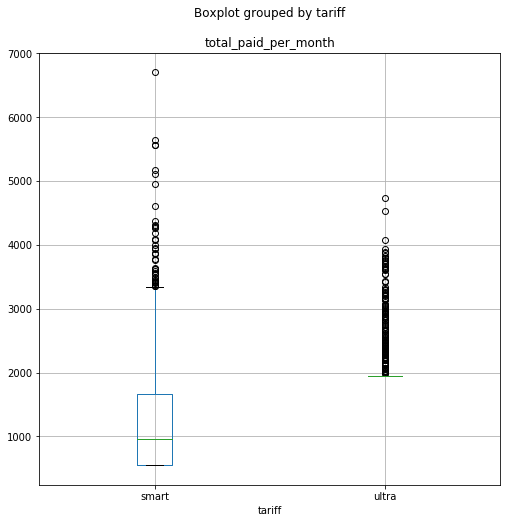

In [25]:
data.boxplot('total_paid_per_month', by='tariff', figsize=(8, 8))

In [26]:
# функция для удаления выбросов
def outlier_removal(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    emissions = (data < q1 - 1.5 * iqr ) | (data > q3 + 1.5 * iqr)
    return data.loc[~emissions]

In [27]:
tariff_smart = data[data['tariff'] == 'smart']['total_paid_per_month']
tariff_ultra = data[data['tariff'] == 'ultra']['total_paid_per_month']

In [28]:
tariff_smart = outlier_removal(tariff_smart)
print('Тариф Смарт\n', tariff_smart)
tariff_ultra = outlier_removal(tariff_ultra)
print('Тариф Ультра\n', tariff_ultra)

Тариф Смарт
 8      1,149.61
9        550.00
10       550.00
11       983.79
12     1,518.75
         ...   
3167     550.00
3167     910.74
3167   1,370.31
3167     966.41
3167     933.40
Name: total_paid_per_month, Length: 2190, dtype: float64
Тариф Ультра
 0      1,950.00
1      1,950.00
2      1,950.00
3      1,950.00
4      1,950.00
         ...   
3167   1,950.00
3167   1,950.00
3167   1,950.00
3167   1,950.00
3167   1,950.00
Name: total_paid_per_month, Length: 851, dtype: float64


In [34]:
alpha = .03

results = st.ttest_ind(
    tariff_smart, 
    tariff_ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.271235034491993e-203
Отвергаем нулевую гипотезу


Тарифы различаются по средней выручке

#### <a name="Revenue_users_from_Moscow"></a> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

#### Гипотезы:
    H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
    H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
data['city'].value_counts()

In [ ]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Провинция')
data

In [ ]:
moscow = data[data['region'] == 'Москва']['total_paid_per_month']
province = data[data['region'] == 'Провинция']['total_paid_per_month']

In [ ]:
moscow = outlier_removal(moscow)
print('Выручка в Москве\n', moscow)
province = outlier_removal(province)
print('Выручка в Провинции\n', province)

In [ ]:
alpha = .03

results = st.ttest_ind(
    moscow, 
    province)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Москва и Провинции не различаются по выручке.

[Вернуться к задачам](#Back)

### <a name="Results"></a> 5. Результаты

#### <a name="Conclusion"></a>  Вывод

1. Из общего количества пользователей оператора, доминируют пользователи с тарифом Смарт (69.35%) из которых 17.05% пользователей платят сумму аналогичную тарифу Ультра, либо сверх тарифа Ультра.  
2. На тарифе Смарт пользователям не хватает минут и трафика предусмотреных тарифом, в то время как на тарифе Ультра минут и трафика с избытком
3. Смс практически не используется на обоих тарифах
4. Средний доход у тарифов различается
5. Москва и Провинции приносят схожий доход

#### <a name="Recommendations"></a>  Рекомендации

1. Необходимо сформировать новый тарифный план (не в замену тарифу Смарт или Ультра так, как есть ползователи, которых устраивают данные тарифы), который будет промежуточным между Смартом и Ультра (идеально дать возможность пользователям выбирать те услуги и их количество, которое необходимы)
2. Необходимо проверить параметры выгрузки данных в файл internet так, как выгружается дополнительный столбец, который дублирует индексы
3. В данных calls в столбце duration, есть нулевые значения, необходимо проверить выгрузку, возможно стоит округление хначений.

[Вернуться к задачам](#Back)